1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

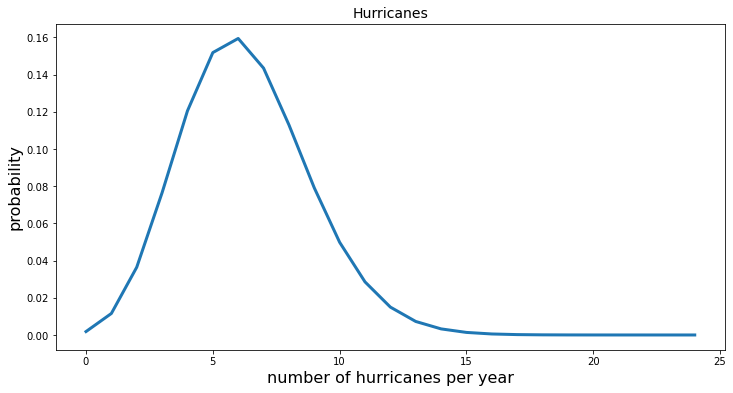

Z score: 3.4661629670697414 (larger than 3)
the probability of observe 15 or more hurricanes is: 0.0005279431738299246 that is smaller than 0.05 so it is correct to reject the null hypothesis: 15 hurricanes is signficantly different


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
from scipy import stats

lam=6.3
x0=15
sigma=lam
x=np.arange(25)
#y=[(lam^n)*exp(-lam)*(1/factorial(n)) for n in x] 

y=[(lam**n)*math.exp(-lam)*(1/math.factorial(n)) for n in x]  

fig = plt.figure(figsize=(12,6))
plt.plot(x, y, linewidth=3)
plt.xlabel('number of hurricanes per year', size=16)
plt.ylabel('probability',size=16)
plt.title('Hurricanes', size=14)
plt.show()
Z=(x0-lam)/(lam**0.5)
print('Z score:',Z,'(larger than 3)')


# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
# note that you can surely perform an integral of stats.norm.pdf, but using the cdf is much more convenient
#print("p-value =", pvalue)
print("the probability of observe 15 or more hurricanes is:", pvalue,'that is smaller than 0.05 so it is correct to reject the null hypothesis: 15 hurricanes is signficantly different')




2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

3.786997938137629


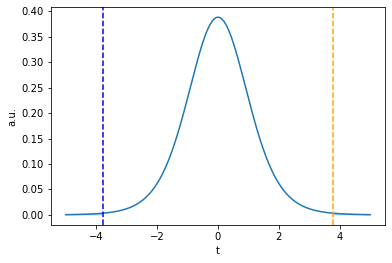

p-value = 0.004302464132864604
Since the p-value is not larger than 0.05/2 we accept the null hypothesis so the change in blood pressures within our sample is NOT statistically significant


In [7]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

pre_avg=np.mean(pre)
post_avg=np.mean(post)

st_pre=np.std(pre, ddof=1)
st_post=np.std(post, ddof=1)

sigma=((st_pre**2+st_post**2)/2)**0.5

T=abs(pre_avg-post_avg)/(sigma*((2/len(pre))**0.5))
print(abs(T))

xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, len(pre) - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = (1.- stats.t.cdf(T, len(pre) - 1)) + ( stats.t.cdf(-T, len(pre) - 1))
print("p-value =", pvalue)
print('Since the p-value is not larger than 0.05/2 we accept the null hypothesis so the change in blood pressures within our sample is NOT statistically significant')

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

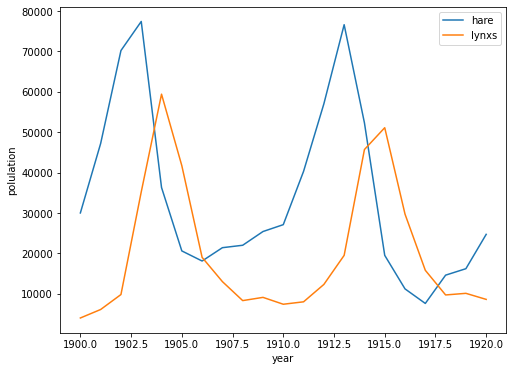

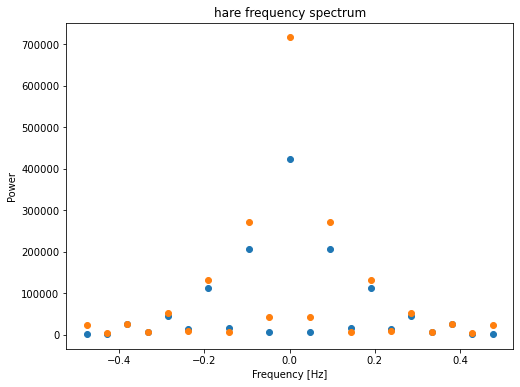

the frequency at 0 Hz is clearly a constant, indeed the y of the previous graph was not zero
from the frequency analisis the interesting frequency is the third one (first on magnitude but different from zero)
lynxs peak frequency:  0.09523809523809523 so that the period is  10.5 years that is reasonable
hare peak frequency:  0.09523809523809523 so that the period is  10.5 years that is reasonable


In [44]:
data = np.loadtxt('populations.txt')
lynxs=data[:,2]
hare=data[:,1]
time=data[:,0]

from scipy import fftpack

plt.figure(figsize=(8, 6))
plt.plot(time, hare, label='hare')
plt.plot(time, lynxs, label='lynxs')
plt.ylabel('polulation')
plt.xlabel('year')
plt.legend()
plt.show()

sig_fft_l = fftpack.fft(lynxs)
power_l = np.abs(sig_fft_l)
sample_freq_l = fftpack.fftfreq(lynxs.size, d=1)
sig_fft_h = fftpack.fft(hare)
power_h = np.abs(sig_fft_h)
sample_freq_h = fftpack.fftfreq(hare.size, d=1)



plt.figure(figsize=(8, 6))
plt.scatter(sample_freq_l, power_l)
plt.scatter(sample_freq_h, power_h)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.title('hare frequency spectrum')
plt.show()
#print(sample_freq)
print('the frequency at 0 Hz is clearly a constant, indeed the y of the previous graph was not zero')
print('from the frequency analisis the interesting frequency is the third one (first on magnitude but different from zero)')
print('lynxs peak frequency: ',sample_freq_l[2],'so that the period is ',1/sample_freq_l[2],'years that is reasonable')
print('hare peak frequency: ',sample_freq_h[2],'so that the period is ',1/sample_freq_h[2],'years that is reasonable')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

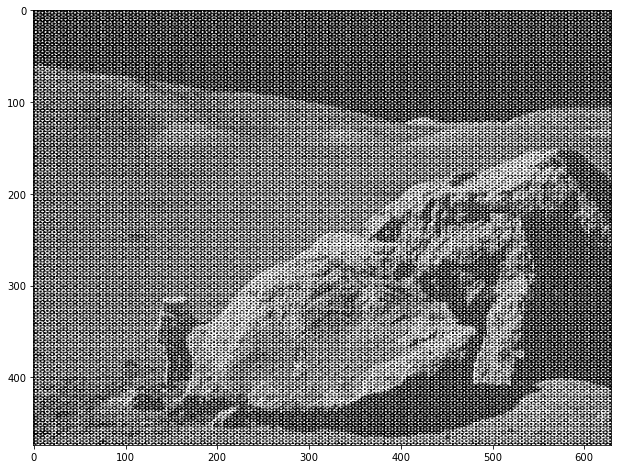

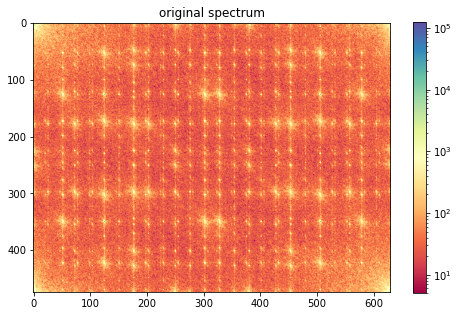

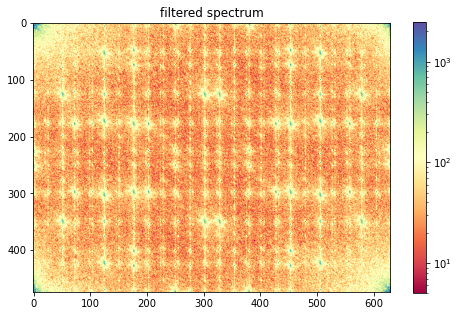

Text(0.5, 1.0, 'Reconstructed Image')

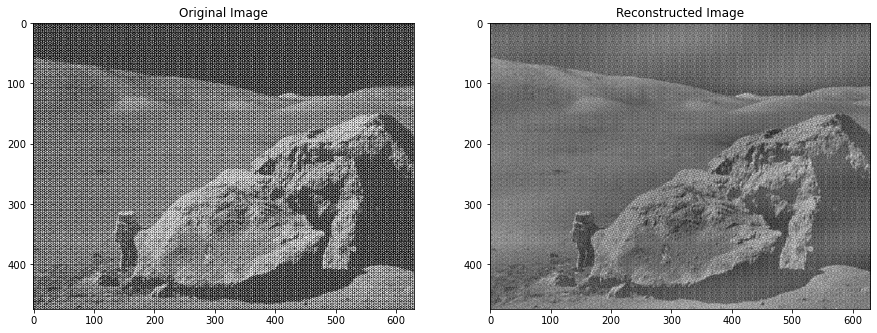

<Figure size 1080x576 with 0 Axes>

In [4]:
from scipy import fftpack

image=plt.imread("moonlanding.png")
plt.figure(figsize=(15, 8))
plt.imshow(image, plt.cm.gray)
plt.show()


image_fft=np.fft.fft2(image)
power = np.abs(image_fft)
sample_freq = fftpack.fftfreq(image.size)


from matplotlib.colors import LogNorm
plt.figure(figsize=(8, 5))
plt.imshow(power, norm=LogNorm(vmin=5), cmap = 'Spectral')
plt.colorbar()
plt.title('original spectrum')
plt.show()




# filtering the spectrum
max_freq=2500    # it's a good compromise to preserve the contrast and filtering the periodic noise

filtered_image_fft=np.where(power<max_freq, image_fft, 0)     # return the fft of the image if the power is smaller than the threshold, otherwise returns 0
plt.figure(figsize=(8, 5))
plt.imshow(np.abs(filtered_image_fft), norm=LogNorm(vmin=5), cmap = 'Spectral')
plt.colorbar()
plt.title('filtered spectrum')
plt.show()


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
ax0, ax1 = axes.flatten()
ax0.imshow(image, plt.cm.gray)
ax0.set_title('Original Image')
reconstructed = fftpack.ifft2(filtered_image_fft)
plt.figure(figsize=(15, 8))
ax1.imshow(np.real(reconstructed), plt.cm.gray)
ax1.set_title('Reconstructed Image')
